# Explorando Dataset Amazon Fine Food Reviews

Importando libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import re
from nltk.tokenize import TweetTokenizer
import nltk
from PIL import Image
from os import path
import wordcloud
from wordcloud import WordCloud

# Carregando dataset com pandas dataframe

In [2]:
df = pd.read_csv("DATASET/Reviews.csv")

Todas as colunas do dataset e número de reviews

In [3]:
print(df.columns.values)

['Id' 'ProductId' 'UserId' 'ProfileName' 'HelpfulnessNumerator'
 'HelpfulnessDenominator' 'Score' 'Time' 'Summary' 'Text']


In [4]:
print(df.head())
print(df.shape)

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

# Simplificação do dataset

Ultilizaremos esse dataset para a classificação automática de polaridade(positivo ou negativo) nos reviews de comida da Amazon. Para isso ultilizaremos as colunas "Text" de onde extrairemos as features para a classifição e "Score" de onde produziremos os labels "positivo" e "negativo" para cada review. Linhas com valores de "Score" iguais a 1,2 e 3 são marcamos como revies negativas. Assim como linhas com valores de "Score" iguais a 4 e 5 são marcadas como positivas.

In [5]:
df = df[['Text','Score']]
print(df.head())
print(df.shape)

                                                Text  Score
0  I have bought several of the Vitality canned d...      5
1  Product arrived labeled as Jumbo Salted Peanut...      1
2  This is a confection that has been around a fe...      4
3  If you are looking for the secret ingredient i...      2
4  Great taffy at a great price.  There was a wid...      5
(568454, 2)


In [6]:
df['Score'] = df['Score'].apply(lambda x : 'pos' if x > 3 else 'neg')
print(df.head())

                                                Text Score
0  I have bought several of the Vitality canned d...   pos
1  Product arrived labeled as Jumbo Salted Peanut...   neg
2  This is a confection that has been around a fe...   pos
3  If you are looking for the secret ingredient i...   neg
4  Great taffy at a great price.  There was a wid...   pos


# Distribuição de classes no dataset

In [7]:
def splitPosNeg(df):
    negReviews = df[df['Score']=='neg']
    posReviews = df[df['Score']=='pos']
    return (negReviews,posReviews)

In [8]:
negReviews,posReviews = splitPosNeg(df)
numberOfNeg,numberOfPos = len(negReviews),len(posReviews)

In [9]:
print("Número de reviws negativas: ",numberOfNeg)
print("Número de reviws positivas: ",numberOfPos)

Número de reviws negativas:  124677
Número de reviws positivas:  443777


Text(0.5,1,'Distribuição de classes')

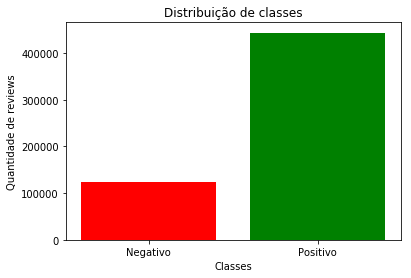

In [10]:
plt.bar(["Negativo","Positivo"],[numberOfNeg,numberOfPos],color=['r','g'])
plt.xlabel('Classes')
plt.ylabel('Quantidade de reviews')       
plt.title('Distribuição de classes')

In [11]:
print( (numberOfNeg*100.0)/len(df)," dos reviews são negativos")
print( (numberOfPos*100.0)/len(df),"  dos reviews são positivos")

21.932645385554505  dos reviews são negativos
78.06735461444549   dos reviews são positivos


# Nuvens de palavras

Funções
preProcessing: realiza pré-processamento em um text
generateCloudWords: gera uma nuvem de palavra a partir de uma string de entrada

In [18]:
def preProcessing(text):
    #Remover \n
    text = re.sub("\n+"," ",text)
    #Remover tags HTML
    text = re.sub("<.*>","",text)
    #Remove links
    text = re.sub(r"http\S+", "",text)
    #Remover multiplos espaços
    text = re.sub(" +"," ",text)
    #Remover caracteres especiais
    text = re.sub("[@|#|“|”|’|‘|®|,|!|?||\[|\]|\.|\"|%|:|\-|_|/|ª|\(|\)|°|\*|🇧|🇷|\'|️|=]",'',text)
    #Remover números
    text = re.sub("[0-9]+",'',text)
    #Lower case
    text = text.lower()
    #Tokenize
    tokens = TweetTokenizer().tokenize(text)
    #remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [token for token in tokens if (token not in stopwords) ]
    
    return " ".join(tokens)

def generateCloudWords(text,fileImg):
    mask = np.array(Image.open(path.join("/home/romulo/PUC/2018.1/Machine Learning/","images.png" )))
    cloud = WordCloud(background_color='white', max_words=2000, mask=mask)
    cloud.generate(text)
    cloud.to_file(fileImg)
    
    return cloud

Aplicando o pré-processamento nos textos das reviews

In [13]:
negReviews['Text'] = negReviews['Text'].apply(lambda x :preProcessing(x))
posReviews['Text'] = posReviews['Text'].apply(lambda x :preProcessing(x))


/home/romulo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/romulo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
print(negReviews.head())
print(posReviews.head())

                                                 Text Score
1   product arrived labeled jumbo salted peanutsth...   neg
3   looking secret ingredient robitussin believe f...   neg
12  cats happily eating felidae platinum two years...   neg
16  love eating good watching tv looking movies sw...   neg
26        candy red flavor plan chewy would never buy   neg
                                                Text Score
0  bought several vitality canned dog food produc...   pos
2  confection around centuries light pillowy citr...   pos
4  great taffy great price wide assortment yummy ...   pos
5  got wild hair taffy ordered five pound bag taf...   pos
6  saltwater taffy great flavors soft chewy candy...   pos


Nuvem de palavras das avaliações negativas

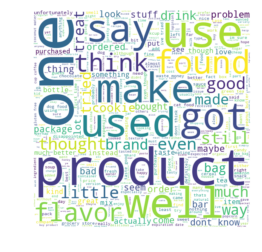

In [19]:
fileImg = "cloudWordsNeg.png"
cloud = generateCloudWords( '\n'.join(negReviews['Text']),fileImg)

plt.figure()
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Nuvem de palavras das avaliações positivas

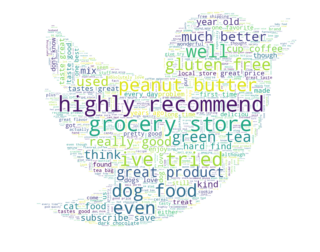

In [17]:
fileImg = "cloudWordsPos.png"
cloud = generateCloudWords( '\n'.join(posReviews['Text']),fileImg)

plt.figure()
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Distribuição de tamanho das reviews